# 데이터 읽기

In [11]:
# Data
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [12]:
#파일 읽기
pd_sas21 = pd.read_sas('hn21_all.sas7bdat', format='sas7bdat')
pd_sas19 = pd.read_sas('hn19_all.sas7bdat', format='sas7bdat')
pd_sas20 = pd.read_sas('hn20_all.sas7bdat', format='sas7bdat')
pd_varname = pd.read_excel('./변수-레이블.xlsx', sheet_name='변수-label')
# D로 시작하고 dg로 끝나는 열 중 값이 1인 행 선택(불균형데이터 방지)
subset20 = pd_sas20[(pd_sas20.filter(regex='^D.*dg$', axis=1) == 1).any(axis=1)]
subset19 = pd_sas19[(pd_sas19.filter(regex='^D.*dg$', axis=1) == 1).any(axis=1)]
subset = pd.concat([subset20, subset19])

#subset.filter(regex='^D.*dg$', axis=1)
# subset을 pd_sas19 데이터프레임에 추가
pd_sas = pd.concat([pd_sas19, subset])
pd_sas

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,O_IMP_LI,O_IMP_LM,O_BR_N_U,O_BR_N_L,O_DENT_U,O_DENT_L,O_F,MO4_17_1,MO4_17_2,E_CLT
0,b'2023.01.13.',b'A751215301',b'A7512153',2019.0,1.0,1.0,1.0,b'A751',1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2023.01.13.',b'A751215303',b'A7512153',2019.0,1.0,1.0,1.0,b'A751',1.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2023.01.13.',b'A751220401',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',1.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2023.01.13.',b'A751220402',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',2.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2023.01.13.',b'A751220403',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,b'2023.01.13.',b'R754370001',b'R7543700',2019.0,8.0,1.0,2.0,b'R754',2.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8100,b'2023.01.13.',b'R754370002',b'R7543700',2019.0,8.0,1.0,2.0,b'R754',2.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8104,b'2023.01.13.',b'R754380201',b'R7543802',2019.0,8.0,1.0,2.0,b'R754',1.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8105,b'2023.01.13.',b'R754381902',b'R7543819',2019.0,8.0,1.0,2.0,b'R754',2.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 필요없는 변수 제거

In [14]:
#가중치 변수 제거
pd_sas = pd_sas.loc[:, ~pd_sas.columns.str.startswith('wt')]
pd_sas
#쓰레기 변수 - float, int형식 아닌 변수 제거
g_var = [col for col in pd_sas.columns if pd_sas[col].dtype not in ['float64', 'int64']]
pd_sas = pd_sas.drop(g_var, axis=1)
pd_sas
#year(조사연도) 제거
pd_sas.drop('year', axis=1, inplace=True)

In [15]:
#값 10000개 이하로 존재하는 변수 제거
pd_sas.dropna(axis=1, thresh=10000, inplace=True)
pd_sas

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,1.0,1.0,1.0,1.0,61.0,1.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,28.0,1.0,2.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,53.0,1.0,1.0,1.0,2.0,3.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
3,1.0,1.0,1.0,2.0,50.0,1.0,1.0,1.0,2.0,3.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
4,1.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,2.0,NaN,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,8.0,1.0,2.0,2.0,26.0,3.0,3.0,3.0,4.0,4.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
8100,8.0,1.0,2.0,2.0,51.0,3.0,3.0,3.0,4.0,3.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
8104,8.0,1.0,2.0,1.0,62.0,3.0,3.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8105,8.0,1.0,2.0,2.0,48.0,3.0,4.0,4.0,5.0,4.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0


In [16]:
#결측치 3000개 이상인 변수만 출력
pd_sas.loc[:,pd_sas.isnull().sum()>3000].isnull().sum()

occp       3533
BH1_1      4981
BH1_2      4981
BH1_3      4981
BH1_8      4981
           ... 
E_MH_l     6675
E_RVO      6966
E_RVO_r    6675
E_RVO_l    6675
E_GR       6741
Length: 106, dtype: int64

In [17]:
#개인 경험과 관련된 변수 제거-LF시작 변수
pd_sas = pd_sas.loc[:, ~pd_sas.columns.str.startswith('LF')]

#영양소 섭취량 변수 중 영양소와 관련없는 변수 제거
cols_to_drop = ['N_DIET', 'N_DIET_WHY', 'N_WAT_C', 'N_PRG', 'N_BFD_Y']
for col in cols_to_drop:
    if col in pd_sas.columns:
        pd_sas.drop(col, axis=1, inplace=True)

#직업재분류 코드 제거
if 'occp' in pd_sas.columns:
  pd_sas = pd_sas.drop('occp', axis=1)

#안전벨트 착용률 제거
pd_sas = pd_sas.loc[:, ~pd_sas.columns.str.startswith('sc')]

#영양표시 제거
pd_sas = pd_sas.loc[:, ~pd_sas.columns.str.startswith('LK_')]

#식사시 동반여부*대상 변수 조사 1인전 결식여부 제거
cols_to_drop = []
for col in pd_sas.columns:
    # L_ + WHO or TO로 끝남 + 조사 1일전 식사 결식여부 변수
    if col.startswith('L_') and (col.endswith('WHO') or col.endswith('TO')):
        cols_to_drop.append(col)
if 'L_BR' in pd_sas.columns:
    cols_to_drop.append('L_BR')
if 'L_LN' in pd_sas.columns:
    cols_to_drop.append('L_LN')
if 'L_DN' in pd_sas.columns:
    cols_to_drop.append('L_DN')
pd_sas = pd_sas.drop(cols_to_drop, axis=1)

#과거력, 가족력 변수 제거 <- 생활습관과 관련되지 않은 변수여서 제거함(추후 필요시 추가 가능)
#pd_sas = pd_sas.loc[:,~pd_sas.columns.str.startswith('D') | ~pd_sas.columns.str.endswith(('ag', 'pr', 'pt'))]
#pd_sas = pd_sas.loc[:,~pd_sas.columns.str.startswith('HE')]

#약 변수 제거
drop_cols = [col for col in ['DI1_2', 'DI2_2', 'DJ4_3', 'LW_oc', 'HE_HPdr', 'HE_DMdr'] if col in pd_sas.columns]
if drop_cols:
    pd_sas.drop(drop_cols, axis=1, inplace=True)

#뇌졸증 후유증 제거
pd_sas.drop('DI3_2', axis=1, inplace=True)

## 결측치 처리

In [18]:
from scipy import stats
#영양소 섭취량 NAN값은 평균치로 대체
cols_N = [col for col in pd_sas.columns if col.startswith('N_')]
for col in cols_N:
    pd_sas[col].fillna(pd_sas[col].mean(), inplace=True)

# 식품 평균 섭취량('DA_'), 빈도('DQ_')
#값이 88(비해당), 99(모름)이면 NAN으로 변환후 NAN값을 최빈값으로 대체
da_dq_cols = [col for col in pd_sas.columns if col.startswith('DA') or col.startswith('DQ')]
for col in da_dq_cols:
    pd_sas[col] = pd_sas[col].replace([88, 99], np.nan)
    mode_val = pd_sas[col].mode()[0]
    pd_sas[col].fillna(mode_val, inplace=True)

#버섯류, 채소류 등 섭취빈도('LS_')
# 99(모름)를 NAN으로 변환 후 NAN값을 최빈값으로 대체
ls_cols = [col for col in pd_sas.columns if col.startswith('LS')]
pd_sas.loc[:, ls_cols] = pd_sas.loc[:, ls_cols].replace(99, np.nan)
for col in ls_cols:
    mode_value = stats.mode(pd_sas[col])[0][0]
    pd_sas[col] = pd_sas[col].fillna(mode_value)

#식사 빈도('L_xx_FQ')
#9(모름) NAN변환 후 NAN값을 최빈값으로 대체
cols_to_check = [col for col in pd_sas.columns if col.startswith('L_') and col.endswith('FQ')]
for col in cols_to_check:
    pd_sas[col].replace({9: np.nan}, inplace=True)
    mode_value = pd_sas[col].mode()[0]
    pd_sas[col].fillna(mode_value, inplace=True)


In [19]:
#출력값 수정
# 값이 8(비해당)이나 9(모름)인 경우 0으로 변환합니다.
cols_to_modify = [col for col in pd_sas.columns if col.startswith('D') and col.endswith('dg')]
pd_sas[cols_to_modify] = pd_sas[cols_to_modify].replace([8, 9], 0)

## 결측치 제거

In [20]:
#결측치 3000개 이상인 변수 제거
cols_to_drop=[]
for col in pd_sas.columns:
    if pd_sas[col].isna().sum() >= 3000:
        cols_to_drop.append(col)
pd_sas.drop(cols_to_drop, axis=1, inplace=True)
pd_sas

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_FOLATE,N_VITC,TLS_CA,TLS_PHOS,TLS_FE,TLS_VA,TLS_B1,TLS_B2,TLS_NIAC,TLS_VITC
0,1.0,1.0,1.0,1.0,61.0,1.0,2.0,1.0,2.0,2.0,...,300.604268,65.100809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,28.0,1.0,2.0,1.0,2.0,4.0,...,300.604268,65.100809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,53.0,1.0,1.0,1.0,2.0,3.0,...,349.862917,39.987078,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
3,1.0,1.0,1.0,2.0,50.0,1.0,1.0,1.0,2.0,3.0,...,435.446565,129.089740,75.00,0.00,0.000,1164.000000,8.400000,8.5400,24.000,92.0
4,1.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,2.0,NaN,...,252.769285,37.094711,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,8.0,1.0,2.0,2.0,26.0,3.0,3.0,3.0,4.0,4.0,...,679.253305,171.067179,8.41,0.00,0.000,0.000000,28.441935,100.0000,100.000,100.0
8100,8.0,1.0,2.0,2.0,51.0,3.0,3.0,3.0,4.0,3.0,...,588.181769,107.145817,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
8104,8.0,1.0,2.0,1.0,62.0,3.0,3.0,3.0,4.0,3.0,...,300.604268,65.100809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8105,8.0,1.0,2.0,2.0,48.0,3.0,4.0,4.0,5.0,4.0,...,227.688056,18.248026,0.18,0.16,0.027,0.030833,0.001400,0.0083,0.017,0.9


In [21]:
#NAN존재하는 행 제거
pd_sas.dropna(inplace=True)
pd_sas

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_FOLATE,N_VITC,TLS_CA,TLS_PHOS,TLS_FE,TLS_VA,TLS_B1,TLS_B2,TLS_NIAC,TLS_VITC
2,1.0,1.0,1.0,1.0,53.0,1.0,1.0,1.0,2.0,3.0,...,349.862917,39.987078,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
3,1.0,1.0,1.0,2.0,50.0,1.0,1.0,1.0,2.0,3.0,...,435.446565,129.089740,75.00,0.00,0.000,1164.000000,8.400000,8.5400,24.000,92.0
5,1.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,1.0,2.0,...,234.627140,61.092637,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
6,1.0,1.0,1.0,2.0,80.0,3.0,1.0,3.0,1.0,4.0,...,303.965684,122.176386,300.00,20.00,8.000,1050.000000,1.100000,1.1000,14.000,100.0
7,1.0,1.0,1.0,2.0,77.0,3.0,2.0,4.0,2.0,1.0,...,212.944259,58.217517,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,8.0,1.0,2.0,2.0,24.0,2.0,2.0,2.0,3.0,3.0,...,194.795171,82.276243,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
8099,8.0,1.0,2.0,2.0,26.0,3.0,3.0,3.0,4.0,4.0,...,679.253305,171.067179,8.41,0.00,0.000,0.000000,28.441935,100.0000,100.000,100.0
8100,8.0,1.0,2.0,2.0,51.0,3.0,3.0,3.0,4.0,3.0,...,588.181769,107.145817,0.00,0.00,0.000,0.000000,0.000000,0.0000,0.000,0.0
8105,8.0,1.0,2.0,2.0,48.0,3.0,4.0,4.0,5.0,4.0,...,227.688056,18.248026,0.18,0.16,0.027,0.030833,0.001400,0.0083,0.017,0.9


In [22]:
# D로 시작하고 dg로 끝나는 열을 선택하여 subset 변수에 저장
subset = pd_sas.filter(regex='^D.*dg$', axis=1)

# 값이 1인 개수를 변수별로 출력
print(subset.eq(1).sum())

DI1_dg     3178
DI2_dg     2564
DI3_dg      299
DI4_dg      399
DI5_dg      154
DI6_dg      275
DM1_dg     1701
DM2_dg     1525
DM3_dg      250
DM4_dg     1097
DJ2_dg      428
DJ4_dg      415
DE2_dg      535
DE1_dg     1248
DC1_dg      106
DC2_dg        9
DC3_dg       88
DC4_dg      112
DC5_dg       55
DC6_dg       32
DC7_dg      157
DC11_dg     191
DF2_dg      616
DL1_dg      549
DJ8_dg     2080
DJ6_dg      916
DH4_dg      826
DH2_dg     2093
DH3_dg      263
DH6_dg      153
DH7_dg       63
DN1_dg       97
DK8_dg      131
DK9_dg       28
DK4_dg       34
DM8_dg      228
dtype: int64


# 의미있는 변수 찾기

## VIF(다중공선성) 제거

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = pd_sas.filter(regex="^D.*dg$")
X = pd_sas.drop(columns=y.columns)

# VIF 값이 10 이상인 feature를 모두 제거하고 VIF 값을 다시 계산
while True:
    # VIF 값과 각 Feature 이름에 대해 설정
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    # VIF 값이 10 이상인 feature를 모두 찾음
    high_vif_features = vif.loc[vif["VIF Factor"] > 10, "features"]

    # VIF 값이 10 이상인 feature가 없는 경우, 루프 종료
    if len(high_vif_features) == 0:
        break

    # VIF 값이 10 이상인 feature를 데이터프레임에서 제거
    X = X.drop(columns=high_vif_features)


In [24]:
# 최종적으로 남은 feature 출력
print(X.columns, len(X.columns))
print(y.columns, len(y.columns))

Index(['region', 'town_t', 'edu', 'cfam', 'genertn', 'allownc', 'house',
       'live_t', 'ainc_unit1', 'ainc_1',
       ...
       'N_FOLATE', 'N_VITC', 'TLS_CA', 'TLS_PHOS', 'TLS_FE', 'TLS_VA',
       'TLS_B1', 'TLS_B2', 'TLS_NIAC', 'TLS_VITC'],
      dtype='object', length=177) 177
Index(['DI1_dg', 'DI2_dg', 'DI3_dg', 'DI4_dg', 'DI5_dg', 'DI6_dg', 'DM1_dg',
       'DM2_dg', 'DM3_dg', 'DM4_dg', 'DJ2_dg', 'DJ4_dg', 'DE2_dg', 'DE1_dg',
       'DC1_dg', 'DC2_dg', 'DC3_dg', 'DC4_dg', 'DC5_dg', 'DC6_dg', 'DC7_dg',
       'DC11_dg', 'DF2_dg', 'DL1_dg', 'DJ8_dg', 'DJ6_dg', 'DH4_dg', 'DH2_dg',
       'DH3_dg', 'DH6_dg', 'DH7_dg', 'DN1_dg', 'DK8_dg', 'DK9_dg', 'DK4_dg',
       'DM8_dg'],
      dtype='object') 36


# 예측모델 생성

## XGboost

In [25]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [26]:
params = {
    'max_depth': 7,#트리 깊이
    'eta': 0.1,
    'subsample': 0.8,#너무 작으면 underfitting, 너무 크면 과적합 -> 0.5 ~ 0.8
    'colsample_bytree': 0.8,#0.5~0.9
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'min_child_weight': 2, #너무 작으면 과적합, 너무 크면 underfitting 1~20
    'gpu_id' : 0,
    'tree_method': 'gpu_hist'
}
num_rounds = 1000#학습진행할때 몇번 반복할것인가 너무 크면 과적합 -> 조금씩 수정

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
import copy

[0]	train-logloss:0.61303
[1]	train-logloss:0.54784
[2]	train-logloss:0.49382
[3]	train-logloss:0.44732
[4]	train-logloss:0.40777
[5]	train-logloss:0.37416
[6]	train-logloss:0.34523
[7]	train-logloss:0.31977
[8]	train-logloss:0.29759
[9]	train-logloss:0.27799
[10]	train-logloss:0.26057
[11]	train-logloss:0.24518
[12]	train-logloss:0.23181
[13]	train-logloss:0.21963
[14]	train-logloss:0.20909
[15]	train-logloss:0.19934
[16]	train-logloss:0.19075
[17]	train-logloss:0.18308
[18]	train-logloss:0.17630
[19]	train-logloss:0.17008
[20]	train-logloss:0.16446
[21]	train-logloss:0.15954
[22]	train-logloss:0.15493
[23]	train-logloss:0.15082
[24]	train-logloss:0.14711
[25]	train-logloss:0.14378
[26]	train-logloss:0.14067
[27]	train-logloss:0.13790
[28]	train-logloss:0.13538
[29]	train-logloss:0.13300
[30]	train-logloss:0.13084
[31]	train-logloss:0.12885
[32]	train-logloss:0.12701
[33]	train-logloss:0.12526
[34]	train-logloss:0.12376
[35]	train-logloss:0.12219
[36]	train-logloss:0.12079
[37]	train-

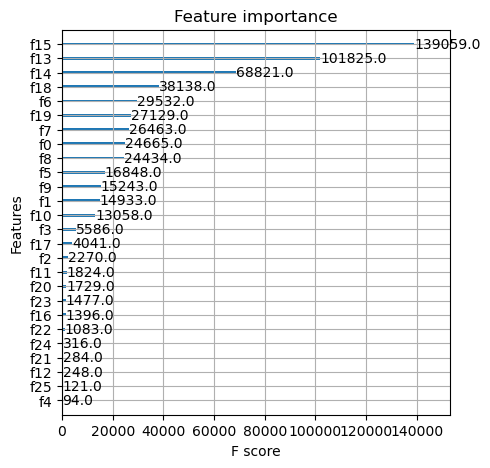

In [28]:
import copy
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 데이터를 복사합니다.
dataset = copy.deepcopy(pd_sas)

# 특성 (X)과 레이블 (y)로 데이터를 분할합니다.
X_features = dataset[X.columns]
y_labels = dataset[y.columns]

# 변수 선택을 위해 XGBoost 모델을 생성하고 학습합니다.
select_xgb_model = xgb.XGBClassifier(**params, n_jobs=-1)
select_xgb_model.fit(X_features, y_labels)

# SelectFromModel을 사용하여 변수를 선택합니다.
selection = SelectFromModel(select_xgb_model, threshold=-np.inf, max_features=26, prefit=False)
selection.fit(X_features, y_labels)

# 선택된 변수만 추출하여 학습 데이터와 테스트 데이터를 생성합니다.
X_features_selected = selection.transform(X_features)
X_train, X_test, y_train, y_test = train_test_split(X_features_selected, y_labels, test_size=0.3, random_state=156)

# XGBoost 학습용 DMatrix를 생성합니다.
dtrain = xgb.DMatrix(data=X_train, label=y_train)

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달하여 모델을 학습합니다.
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=500, evals=wlist)

# 테스트 데이터에 대한 예측 확률을 얻습니다.
dtest = xgb.DMatrix(data=X_test)
pred_probs = xgb_model.predict(dtest)

# 각 예측 확률을 0 또는 1로 변환하여 예측합니다.
preds = (pred_probs > 0.5).astype(int)

# 각 레이블에 대해 평가 지표를 계산합니다.
confusion_list = []
accuracy_list = []
precision_list = []
recall_list = []
F1_list = []

for idx, column in enumerate(y.columns):
    y_test_label = y_test.iloc[:, idx]
    y_pred_label = preds[:, idx]

    confusion = multilabel_confusion_matrix(y_test_label, y_pred_label)
    accuracy = accuracy_score(y_test_label, y_pred_label)
    precision = precision_score(y_test_label, y_pred_label)
    recall = recall_score(y_test_label, y_pred_label)
    F1 = f1_score(y_test_label, y_pred_label)

    confusion_list.append(confusion)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    F1_list.append(F1)

    print(f"'{column}' 질병에 대한 성능 지표:")
    print("혼동 행렬:", confusion)
    print("정확도:", accuracy)
    print("정밀도:", precision)
    print("재현율:", recall)
    print("F1 점수:", F1)

# 평균 평가 지표를 계산합니다.
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_F1 = sum(F1_list) / len(F1_list)

print("평균 정확도:", mean_accuracy)
print("평균 정밀도:", mean_precision)
print("평균 재현율:", mean_recall)
print("평균 F1 점수:", mean_F1)

# 변수 중요도를 시각화합니다.
fig, ax = plt.subplots(figsize=(5, 5))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()


In [29]:
# 각 질병의 평가 점수를 저장할 딕셔너리를 생성합니다.
disease_scores = {}

# 각 레이블에 대해 평가 지표를 계산합니다.
for idx, column in enumerate(y.columns):
    y_test_label = y_test.iloc[:, idx]
    y_pred_label = preds[:, idx]

    confusion = multilabel_confusion_matrix(y_test_label, y_pred_label)
    accuracy = accuracy_score(y_test_label, y_pred_label)
    precision = precision_score(y_test_label, y_pred_label)
    recall = recall_score(y_test_label, y_pred_label)
    F1 = f1_score(y_test_label, y_pred_label)

    # 평가 점수를 딕셔너리에 저장합니다.
    disease_scores[column] = {
        '정확도': accuracy,
        '정밀도': precision,
        '재현율': recall,
        'F1 점수': F1
    }

#    print(f"'{column}' 질병에 대한 성능 지표:")
#    print("혼동 행렬:", confusion)
#    print("정확도:", accuracy)
#    print("정밀도:", precision)
#    print("재현율:", recall)
#    print("F1 점수:", F1)

# 평균 평가 지표를 계산합니다.
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_F1 = sum(F1_list) / len(F1_list)

print("평균 정확도:", mean_accuracy)
print("평균 정밀도:", mean_precision)
print("평균 재현율:", mean_recall)
print("평균 F1 점수:", mean_F1)

# 각 질병에 대한 평가 점수를 출력합니다.
for disease, scores in disease_scores.items():
    disease_name = pd_varname.loc[pd_varname['변수'] == disease, '레이블'].values[0]
    print(f"{disease_name} 질병 평가 점수:")
    print(scores)


평균 정확도: 0.9675513792724476
평균 정밀도: 0.8355910419310639
평균 재현율: 0.539042037465643
평균 F1 점수: 0.6417932336361162
고혈압 의사진단 여부 질병 평가 점수:
{'정확도': 0.8618529508737224, '정밀도': 0.8174006444683136, '재현율': 0.7534653465346535, 'F1 점수': 0.7841318907779494}
이상지질혈증 의사진단 여부 질병 평가 점수:
{'정확도': 0.8694362017804155, '정밀도': 0.7829787234042553, '재현율': 0.6943396226415094, 'F1 점수': 0.7359999999999999}
뇌졸중 의사진단 여부 질병 평가 점수:
{'정확도': 0.9815364325750082, '정밀도': 0.90625, '재현율': 0.5370370370370371, 'F1 점수': 0.6744186046511628}
심근경색증 또는 협심증 의사진단 여부 질병 평가 점수:
{'정확도': 0.9696669963732278, '정밀도': 0.8125, '재현율': 0.45774647887323944, 'F1 점수': 0.5855855855855856}
심근경색증 의사진단 여부 질병 평가 점수:
{'정확도': 0.9914276294098252, '정밀도': 0.84375, '재현율': 0.5625, 'F1 점수': 0.675}
협심증 의사진단 여부 질병 평가 점수:
{'정확도': 0.9785690735245631, '정밀도': 0.8653846153846154, '재현율': 0.4368932038834951, 'F1 점수': 0.5806451612903225}
관절염 의사진단 여부 질병 평가 점수:
{'정확도': 0.9007583250906693, '정밀도': 0.7559808612440191, '재현율': 0.6135922330097088, 'F1 점수': 0.677384780278671}
골관절염 

In [31]:
# F1 스코어를 기준으로 내림차순으로 정렬하여 출력합니다.
sorted_disease_scores = sorted(disease_scores.items(), key=lambda x: x[1]['F1 점수'], reverse=True)

print("\nF1 점수가 높은 순으로 정렬된 질병 평가 점수:")
for disease, scores in sorted_disease_scores:
    disease_name = pd_varname.loc[pd_varname['변수'] == disease, '레이블'].values[0]
    print(f"{disease_name} 질병 평가 점수:")
    print(scores)


F1 점수가 높은 순으로 정렬된 질병 평가 점수:
중이염 의사진단 여부(소아,청소년 포함) 질병 평가 점수:
{'정확도': 0.9996702934388394, '정밀도': 1.0, '재현율': 0.9957983193277311, 'F1 점수': 0.9978947368421053}
아토피피부염 의사진단 여부(소아,청소년 포함) 질병 평가 점수:
{'정확도': 0.9996702934388394, '정밀도': 1.0, '재현율': 0.9934640522875817, 'F1 점수': 0.9967213114754099}
당뇨병 의사진단 여부 질병 평가 점수:
{'정확도': 0.9551599076821629, '정밀도': 0.8632707774798928, '재현율': 0.7911547911547911, 'F1 점수': 0.8256410256410256}
고혈압 의사진단 여부 질병 평가 점수:
{'정확도': 0.8618529508737224, '정밀도': 0.8174006444683136, '재현율': 0.7534653465346535, 'F1 점수': 0.7841318907779494}
위암 의사진단 여부 질병 평가 점수:
{'정확도': 0.9953841081437521, '정밀도': 0.875, '재현율': 0.65625, 'F1 점수': 0.75}
백내장 의사진단 여부 질병 평가 점수:
{'정확도': 0.8948236069897791, '정밀도': 0.7929292929292929, '재현율': 0.7061469265367316, 'F1 점수': 0.7470261697065821}
이상지질혈증 의사진단 여부 질병 평가 점수:
{'정확도': 0.8694362017804155, '정밀도': 0.7829787234042553, '재현율': 0.6943396226415094, 'F1 점수': 0.7359999999999999}
기타암1 의사진단 여부 질병 평가 점수:
{'정확도': 0.9894493900428618, '정밀도': 0.9285714285714286, '재현